In [1]:
import os
# Change the directory to where the .nc files are located
# Create the input directory
input_dir = os.chdir('./wget-20220801093729/Inputs')

In [2]:
# Check the files located in the input directory
# Create an empty list to store the file names (optional)
file_name = []

for files in os.listdir(input_dir):
    # Only list files with a .nc extension
    if files[-3:] == '.nc':
        file_name.append(files) # Append the file names in the list
        # print(files)

# Check the first 3 file names
file_name[0:3]

['tas_EAS-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-4_v0_day_20200101-20201230.nc',
 'tas_EAS-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-4_v0_day_20210101-20211230.nc',
 'tas_EAS-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-4_v0_day_20220101-20221230.nc']

In [3]:
import xarray as xr

# Load all files as a single dataset
ds = xr.open_mfdataset('./*.nc',decode_times=True, engine='netcdf4',parallel=True)
# xarray's HTML representation
ds

<xarray.Dataset>
Dimensions:    (time: 3960, y: 247, x: 381, bnds: 2)
Coordinates:
    height     float64 2.0
    lat        (y, x) float64 dask.array<chunksize=(247, 381), meta=np.ndarray>
    lon        (y, x) float64 dask.array<chunksize=(247, 381), meta=np.ndarray>
  * time       (time) object 2020-01-01 12:00:00 ... 2030-12-30 12:00:00
  * x          (x) float64 -4.75e+06 -4.725e+06 -4.7e+06 ... 4.725e+06 4.75e+06
  * y          (y) float64 -3.075e+06 -3.05e+06 ... 3.05e+06 3.075e+06
Dimensions without coordinates: bnds
Data variables:
    crs        (time) |S1 b'0' b'0' b'0' b'0' b'0' ... b'0' b'0' b'0' b'0' b'0'
    tas        (time, y, x) float32 dask.array<chunksize=(360, 247, 381), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes: (12/107)
    project_id:                                      CORDEX
    ipcc_scenario_code:                              RCP85
    institute_id:                                    ICTP
    note:                                            The domain is larger tha...
    comment:                                         RegCM CORDEX ea run
    experiment:                                      EAS-22
    ...                                              ...
    holtslag_th10_maximize:                          1
    holtslag_th10_minimize:                          0
    clm_land_surface_dataset_selection:              1
    clm_use_modified_lawrence_albedo:                1
    clm_lai&sai_dataset_selection:                   1
    frequency:                                       day

##### Long-term Mean

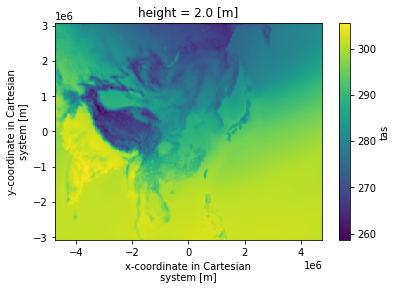

In [4]:
# Plot average across the time dimension
dsAvg = ds['tas'].mean(dim='time')
# dsAvg.to_netcdf('mean.nc')
dsAvg.plot()

##### Days above 95F (Indicator #401)

In [5]:
# Convert Fahrenheit to Kelvin
def f2k(f):
    k = (f-32)*(5/9)+273.15
    return k

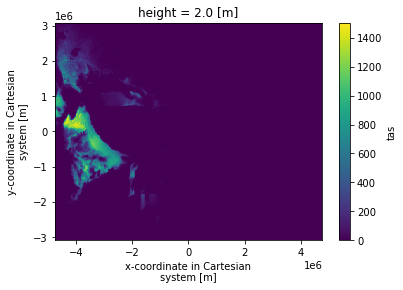

In [6]:
t95 = f2k(95)
ds_95 = ds['tas'].where(ds['tas']>t95).count(dim='time')
ds_95.plot()

##### 5-Day Maximum Temperature (Indicator #402)

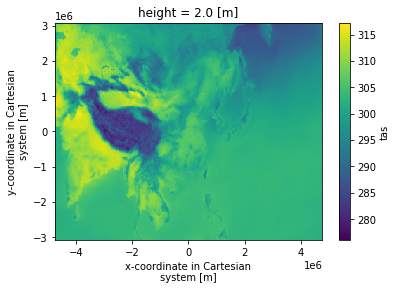

In [7]:
ds_5mx = ds['tas'].rolling({'time':5}).mean().max(dim='time')
ds_5mx.plot()

##### High Heat Days (Indicator #403)

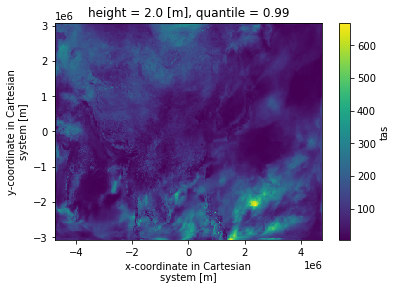

In [8]:
tq99 = ds['tas'][0:360].quantile(.99,dim='time')
ds['tas'].where(ds['tas']>tq99).count(dim='time').plot()

##### Frost Days (Indicator #404)

In [9]:
# Convert Fahrenheit to Kelvin
def f2k(f):
    k = (f-32)*(5/9)+273.15
    return k

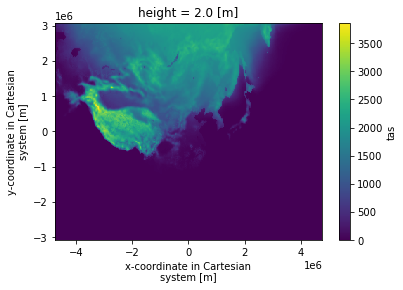

In [10]:
t32 = f2k(32)
ds_32 = ds['tas'].where(ds['tas']<t32).count(dim='time')
ds_32.plot()

##### Heating Degree Days (Indicator #501)

In [11]:
# Convert Fahrenheit to Kelvin
def f2k(f):
    k = (f-32)*(5/9)+273.15
    return k

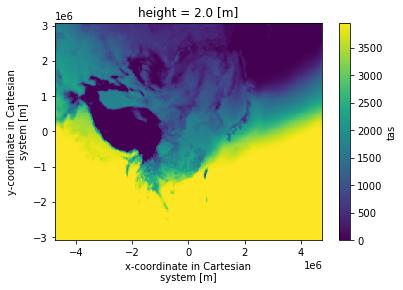

In [12]:
t65 = f2k(65)
ds_65h = ds['tas'].where(ds['tas']>t65).count(dim='time')
ds_65h.plot()

##### Cooling Degree Days (Indicator #502)

In [13]:
# Convert Fahrenheit to Kelvin
def f2k(f):
    k = (f-32)*(5/9)+273.15
    return k

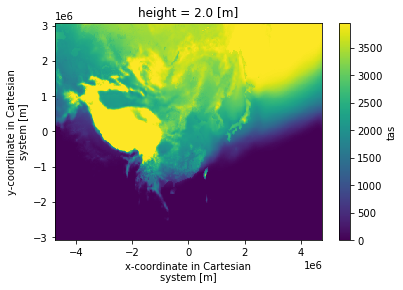

In [14]:
t65 = f2k(65)
ds_65c = ds['tas'].where(ds['tas']<t65).count(dim='time')
ds_65c.plot()

##### 5-Day Minimum Temperature (Indicator #503)

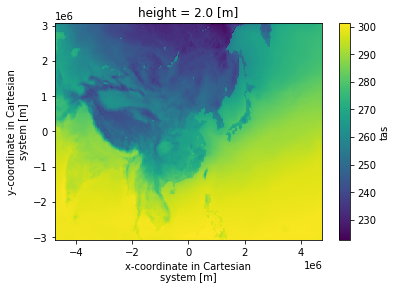

In [15]:
ds_5mn = ds['tas'].rolling({'time':5}).mean().min(dim='time')
ds_5mn.plot()